### 使用 Linear Models 預測房價
* 練習參考網址 : https://www.kaggle.com/code/apapiu/regularized-linear-models
* 練習資料網址 : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

* 這個練習我將逐一解讀程式，我將再不熟悉的語法上逐一做筆記，並補充相關知識

### 1.載入套件 與 資料集

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew      # 計算篇度函數
from scipy.stats import pearsonr  # 計算兩個數列之間的皮爾森相關係數

#### 皮爾森相關係數
皮爾森相關係數是一種用來衡量兩個數據集之間線性相關程度的統計指標，簡單來說，它告訴我們兩組數據是否呈現相似的趨勢：當一組數據增加時，另一組數據是傾向於增加、減少還是保持不變。
* 兩組數據的相關係數為1，表示它們呈現完全正向線性相關，也就是說，當一組數據增加時，另一組數據也一定會增加，反之亦然。相反，如果相關係數為-1，表示它們呈現完全負向線性相關，一組數據增加時，另一組數據會相應減少
* 如果相關係數接近0，則表示兩組數據之間幾乎沒有線性關係，也就是說它們的變化並不會隨著對方的變化而變化。

In [173]:
test = pd.read_csv(r'E:\DataLearn\1.House\4-Linear Models\data\test.csv')
train = pd.read_csv(r'E:\DataLearn\1.House\4-Linear Models\data\train.csv')

In [174]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [175]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### 特徵說明
* 特徵	        說明
* SalePrice	     房產銷售價格
* MSSubClass	 銷售的住宅類型
* MSZoning	     銷售區域分類
* LotFrontage	 與房子相連街道的距離
* LotArea	     地坪面積
* Street         通往房子的道路類型
* Alley	胡同
* LotShape	房子形狀
* LandContour	房子的平整度
* Utilities	水電等公共設施種類
* LotConfig	房子處該建案位置
* LandSlope	房子的坡度
* Neighborhood	房子位於 Ames city的哪區
* Condition1	房子附近交通或公共設施狀況
* Condition2	房子附近交通或公共設施狀況
* BldgType	房子類型
* HouseStyle	房子風格
* OverallQual	房子整體材料與飾面等級
* OverallCond	房子整體等級
* YearBuilt	建照年份
* YearRemodAdd	改建日期
* RoofStyle	屋頂類型
* RoofMatl	屋頂材質
* Exterior1st	房屋外牆飾面
* Exterior2nd	房屋外牆飾面(如有多種材質)
* MasVnrType	砌體材質
* MasVnrArea	砌體面積
* ExterQual	房屋外牆材質等級
* ExterCond	房屋外牆材質現況等級
* Foundation	房屋基礎材質
* BsmtQual	地下室高度
* BsmtCond	地下室的狀況
* BsmtExposure	地下室採光程度
* BsmtFinType1	地下室裝修等級
* BsmtFinSF1	地下室1的面積
* BsmtFinType2	地下室裝修等級(如有多種類型)
* BsmtFinSF2	地下室2的面積
* BsmtUnfSF	未完成的地下室面積
* TotalBsmtSF	地下室總面積
* Heating	暖爐類型
* HeatingQC	暖爐等級
* CentralAir	是否有中央空調
* Electrical	電力系統
* 1stFlrSF	一樓面積
* 2ndFlrSF	二樓面積
* LowQualFinSF	整棟低質量成品的面積
* GrLivArea	地面之上的面積
* BsmtFullBath	地下室的全浴室數量
* BsmtHalfBath	地下室的半浴室數量
* FullBath	地面之上的全浴室數量
* HalfBath	地面之上的半浴室數量
* Bedroom	地面之上的臥室數量
* KitchenAbvGr	地面之上的廚房數
* KitchenQual	廚房等級
* TotRmsAbvGrd	地面之上的房間數(不含浴室)
* Functional	家電功能等級
* Fireplaces	壁爐數量
* FireplaceQu	壁爐等級
* GarageType	車庫位置
* GarageYrBlt	車庫建照年份
* GarageFinish	車庫內部裝潢
* GarageCars	車庫可容納車子的數量
* GarageArea	車庫面積
* GarageQual	車庫等級
* GarageCond	車庫條件
* PavedDrive	車道材質
* WoodDeckSF	木露臺面積
* OpenPorchSF	開放式門廊面積
* EnclosedPorch	封閉式門廊面積
* 3SsnPorch	三季門廊面積
* ScreenPorch	屏幕門廊面積
* PoolArea	泳池面積
* PoolQC	泳池等級
* Fence	柵欄等級
* MiscFeature	其餘未涵蓋的設施
* MiscVal	雜項功能的價值
* MoSold	銷售月份
* YrSold	銷售年份
* SaleType	銷售類型
* SaleCondition	銷售條件

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3000x2000 with 0 Axes>

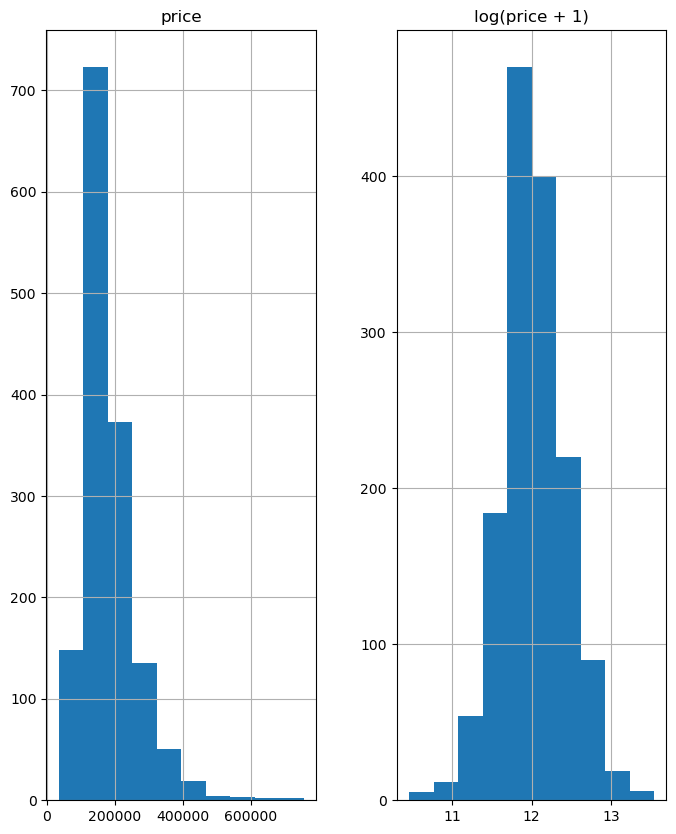

In [176]:
# 設定畫布大小
plt.figure(figsize=(30,20))
# 設定圖片資料
# 左邊圖片為原本售價的資料分布。 右邊的圖為售價資料取 log(對數) + 1 後的資料分布
prices = pd.DataFrame({"price": train["SalePrice"], "log(price + 1)": np.log1p(train["SalePrice"])})
# 繪製直條圖
prices.hist()

# 顯示圖片
plt.show

由上圖可以看到，原先資料分布屬於左偏，而經過取log+1後的SalePrice資料變成正態分布
* np.log1p 解讀
    * **np.log1p**用於計算 log(x+1)。而至於 +1 原因為數學上 **log(0)** 是未定義的
    * 使用這個函數時，可以再數據接近0時進行合理的數據轉換
    * 而 **np.log1p** 可以對較大的數值進行壓縮，同時拉伸較小數值，使資料更接近 **正態分布**

合併 train 與 test 兩個資料

In [177]:
# all_data 為合併除了 train 的 SalePrice 其他特徵的資料
all_data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'],
                      test.loc[:, 'MSSubClass':'SaleCondition']))
all_data.reset_index(drop=True, inplace=True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#### 2.進行數據轉換

In [178]:
# 對訓練目標變數進行  log(x+1) 運算，使目標變數偏向正態分布
train['SalePrice'] = np.log1p(train['SalePrice'])
train['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

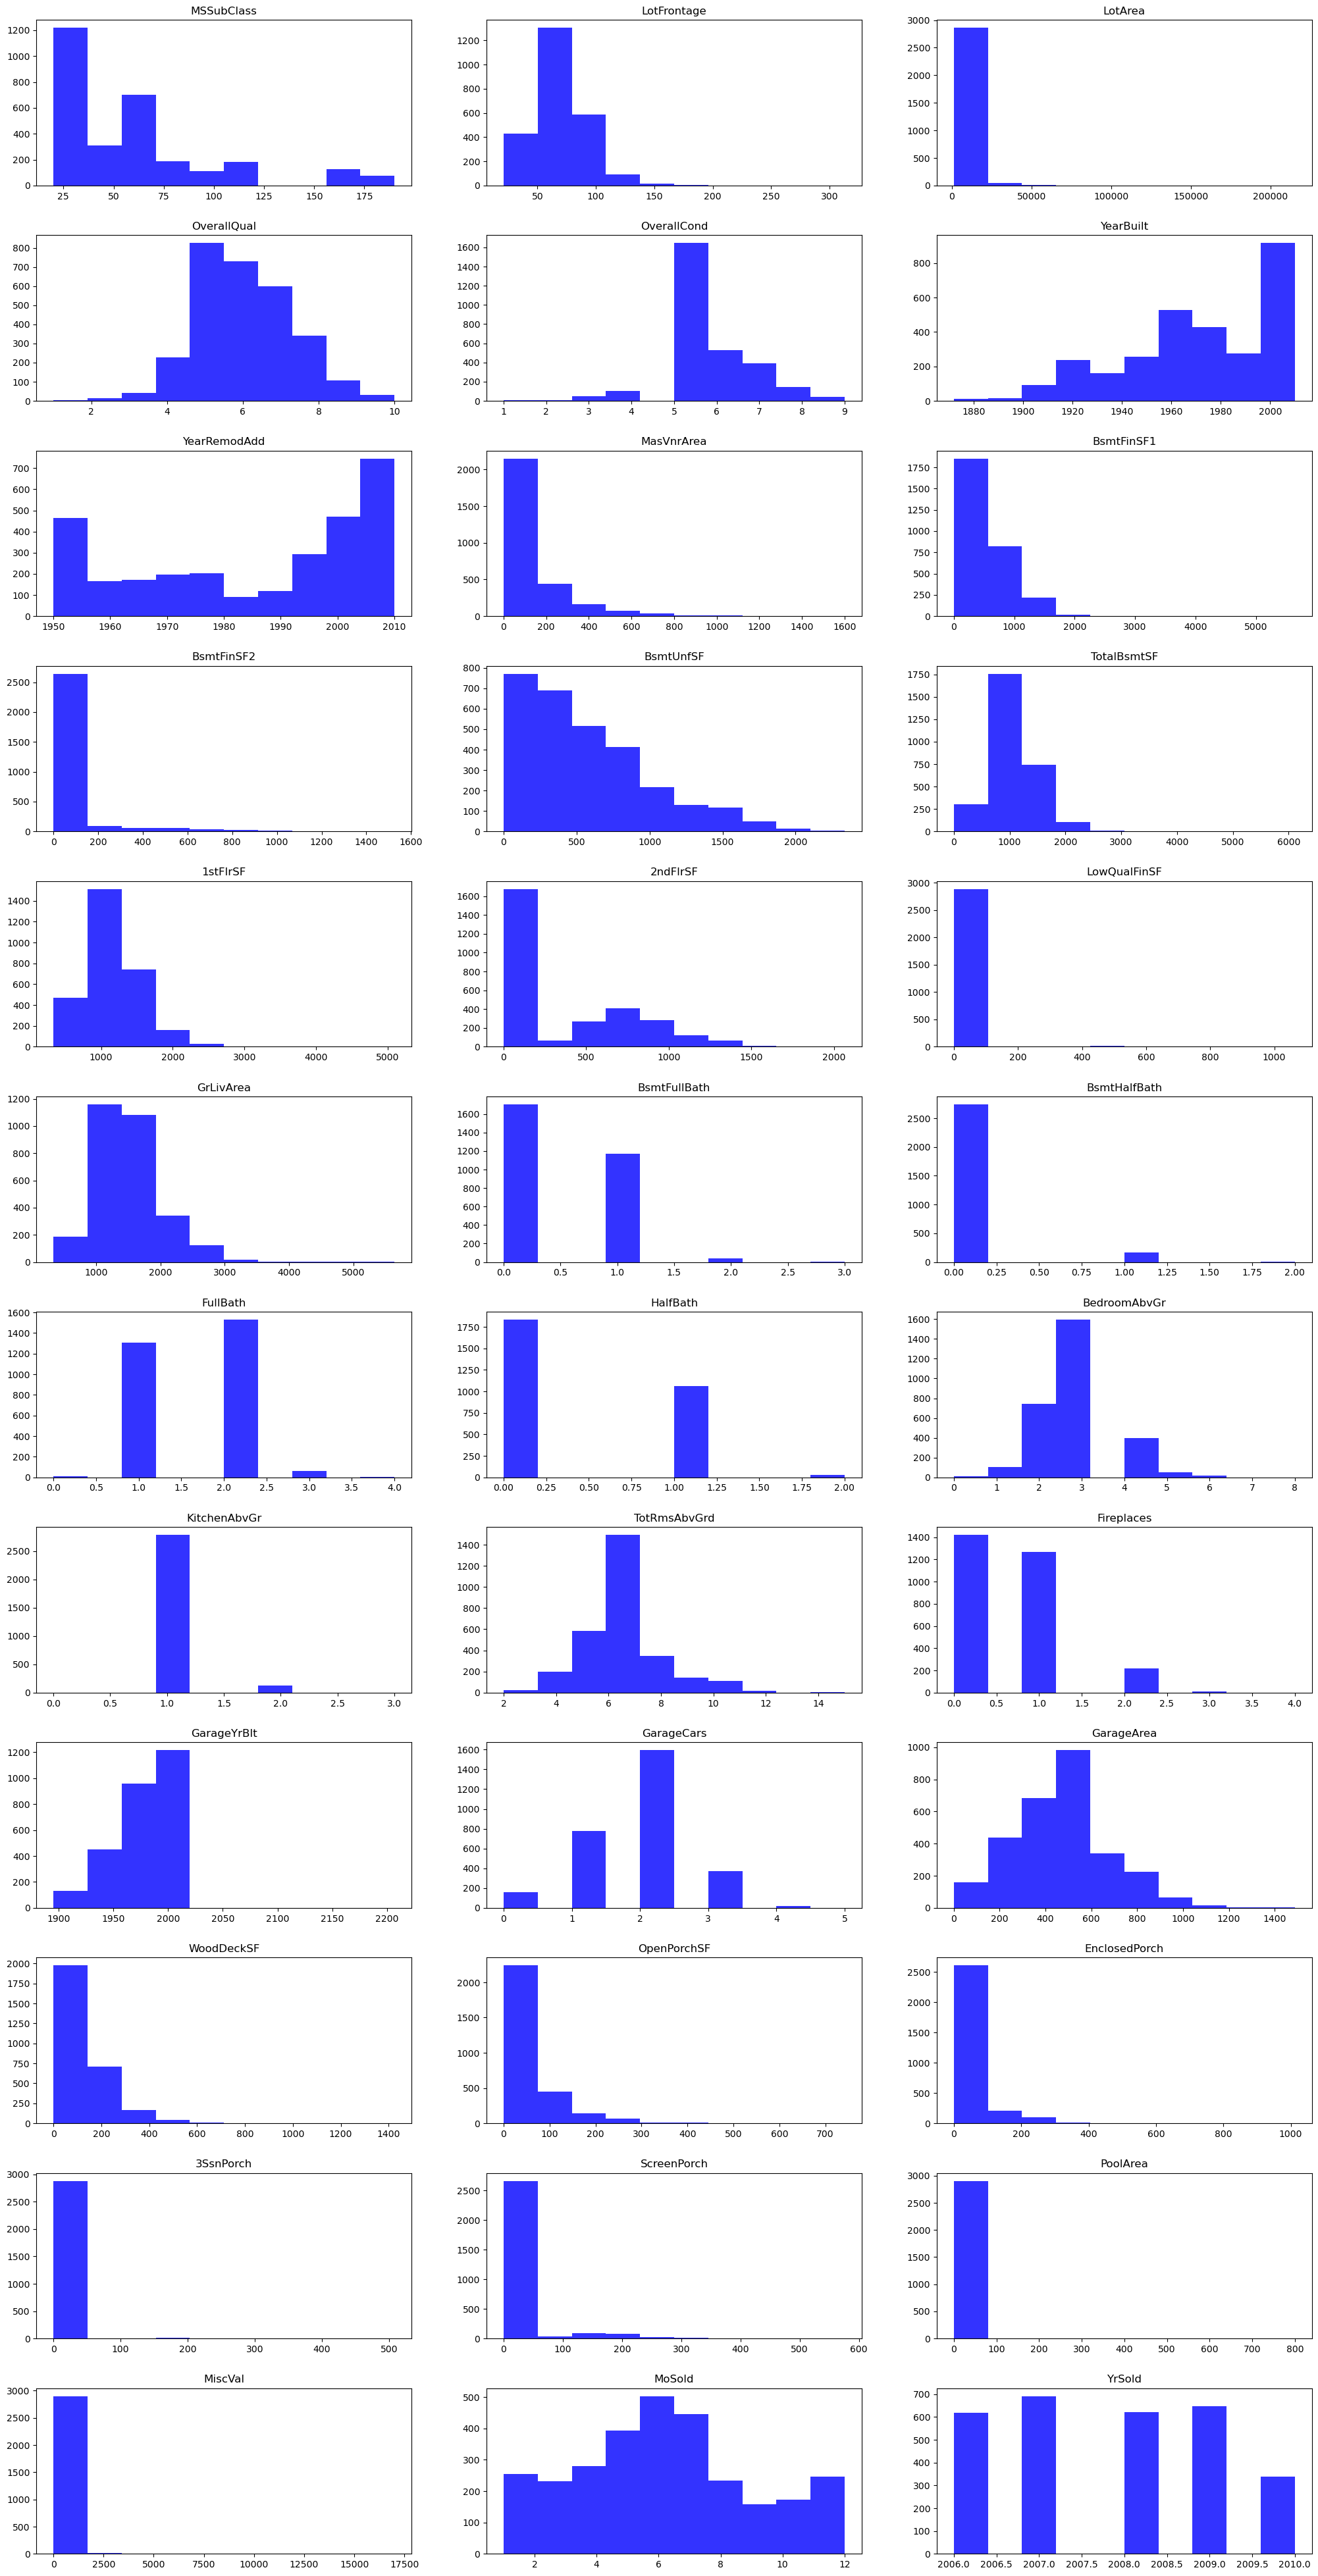

In [179]:
# numeric_feats 留下數值特徵的資料
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index    
# 設定繪圖的子圖
fig, axes = plt.subplots(
    nrows=len(numeric_feats) // 3,
    ncols=3,
    figsize=(25, 50))
# 將 axes 降維成一維
axes = axes.flatten()
# 使用迴圈繪製每個特徵的資料分布
for i, feature in enumerate(numeric_feats):
    # 使用直方圖繪製特徵的分佈
    axes[i].hist(all_data[feature], color='blue', alpha=0.8)
    # 設置子圖的標題
    axes[i].set_title(feature)
# 調整子圖之間的間距
plt.subplots_adjust(hspace=0.3)
# 顯示繪製結果
plt.show()

以上 我們可以看到 numeric_feats(純數值欄位資料)所有特徵的資料分布

In [180]:
# 移除所有帶有缺失值的行，最後計算出 偏度 放進去 skew_feats
skew_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
# 篩選出偏度大於 0.75 的特徵
skew_feats = skew_feats[skew_feats > 0.75]
# 將 skew_feats 轉換為特徵索引的數組
skew_feats = skew_feats.index
# 從 all_data 中取出 skew_feats對應特徵進行 log + 1 轉換
all_data[skew_feats] = np.log1p(all_data[skew_feats])
skew_data = all_data[skew_feats]

可以看到資料中對應 skew_data 的特徵已經被取 log，

In [181]:
skew_data

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2915,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
2916,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
2917,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,...,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [182]:
all_data = pd.get_dummies(all_data)

pd.get_dummies 用於處理數據中類別(categorical)，通常為文字形資料
 * 具體來說，它會將每個類別特徵的不同值分成獨立的列（或特徵），然後使用1和0來表示是否存在某個值。這樣做的好處是，原本的文字特徵變成了數字，這樣機器學習模型可以更容易地處理它們

#### 填補空值 使用 fillna()  填補的數值為平均值 .mean()

In [183]:
all_data = all_data.fillna(all_data.mean())

In [184]:
all_data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 288, dtype: int64

現在我們可以看到欄位空值均被填補了

* 而原本這篇程式的補空值方式是有缺陷的
* 之後下一個自我練習，我會使用自己的方式來填補空值，看能不能提升 Linear Models 的準度

In [185]:
X_train = all_data[:train.shape[0]]  # 訓練集
X_test = all_data[train.shape[0]:]   # 測試集
# y 包含了 train 數據集中的 "SalePrice
y = train.SalePrice

### 開始訓練數據
 使用 **Sklearn** 模組的 **正則化線性回歸模型**
* 嘗試使用 **l_1（Lasso）** 與 **l_2（Ridge）** 正則化 並且定義一個韓數返回交查驗證的 **RMSE(均方根誤差)**
    * 以上兩種方式，都用於線性回歸的正則化技術，主要防止數據訓練後的模型過度擬合
    * 1. **l_1（Lasso）:** 正則化的運作原理是在線性回歸模型的損失函數中添加一個額外的項，該項是模型中特徵權重的絕對值之和，乘以一個稱為超參數（alpha）的正數。簡單來說就是自動篩選重要的特徵，消除不重要的特徵
        * 舉例說明 : 以本數據來看，該技術就會自動篩選出可能對房價影響較大的特徵，例如面積、土地大小、物件位置
    * 2. **l_2（Ridge）: Ridge** 正則化的運作原理是在線性回歸模型的損失函數中添加一個額外的項，該項是模型中特徵權重的平方和，乘以一個**超參數（alpha）**。這個項的存在會導致模型傾向縮小特徵權重，但不會完全為 0 ，從而保留所有的特徵，不至於完全消失
        * 舉例說明 : 假設你在一個預測股票收益的模型中使用 **Ridge 正則化**，這個模型可能會發現多個特徵（比如過去幾天的股票價格變動、市場指數等）

In [186]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

#### 套件筆記
* 1. **"Ridge"** 和 **"Ridge"** :
    * 1.**Ridge :** L2 正規化線性回歸模型，用來控制模型的複雜性。
    * 2.**RidgeCV :** 是 **Ridge 正規化**線性回歸的交叉驗證版本，用於選擇最佳的正規化超參數 alpha
* 2. **ElasticNet** :
    * 結合了 **L1 正規化（Lasso）** 和 **L2 正規化（Ridge）**，通過兩者的組合來控制模型的複雜性
* 3. **LassoCV 和 LassoLarsCV** :
    * 1.**LassoCV** : **Lasso** 正規化線性回歸的交叉驗證版本，用於選擇最佳的正規化超參數 alpha
    * 2.**LassoCV** : 是基於 **Least Angle Regression（LARS）** 的 Lasso 正規化的交叉驗證版本
* 4. **cross_val_score**:
    * 用於執行交叉驗證的函數。它用於評估機器學習模型的性能，通過將數據集分成多個子集，進行多次訓練和測試，並返回每次測試的分數。這有助於評估模型的泛化能力，避免過度擬合

In [187]:
# 建立一個函數 rmse_cv 計算使用 Cross-Validation 來評估 RMSE
def rmse_cv(model):
    # scoring="neg_mean_squared_error" : MSE。評估模型性能指標
    # cv=5 將訓練數據分成 5 個 子集。依次使用其中 4 個做訓練然後測試剩餘的子集，過程重複 5 次
    # -cross_val_score 這邊要算 RMSE，RMSE在評分上越小越好
    rmse = np.sqrt(-cross_val_score (
        model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return (rmse)

In [188]:
model_ridge = Ridge()

In [189]:
# 數值表示正規化的強度
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# 創建一個 Ridge 正規化模型，並將超參alphas 迭代進入 alpha
# rmse_cv 執行交叉驗證，評估該模型的性能，並計算均方根誤差（RMSE）的平均值
# 將平均 RMSE 值添加到 cv_ridge 列表中，這個列表將包含不同 alpha 值下的 RMSE
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'RMSE')

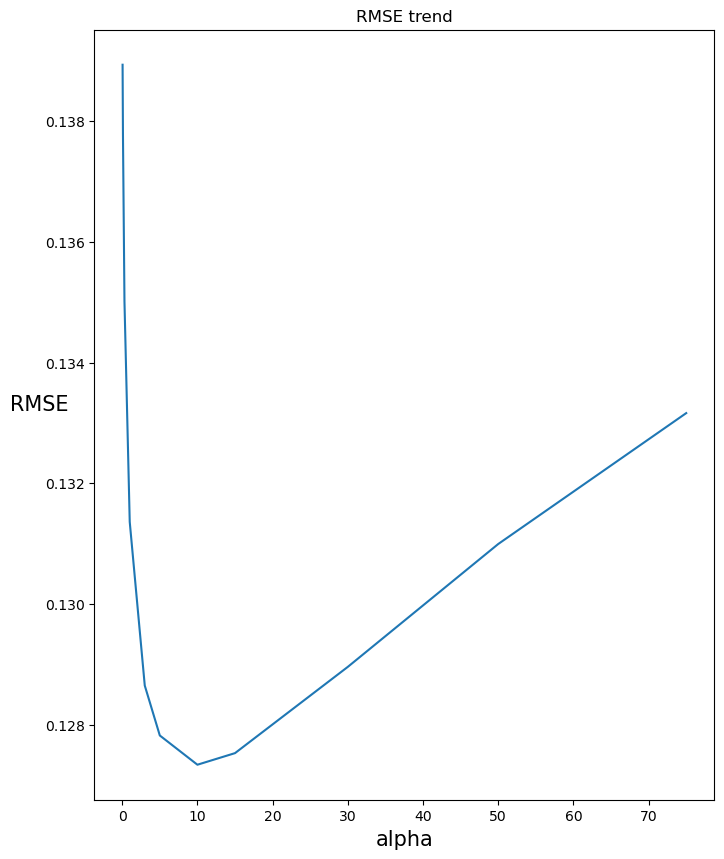

In [190]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = 'RMSE trend')
plt.xlabel('alpha', fontdict={'fontsize':15})
plt.ylabel('RMSE', fontdict={'fontsize':15, 'rotation':360})

In [191]:
cv_ridge.min()

0.12733734668670776

根據上面的圖來看，曲線呈現 U 字形，alpha 最理想的數值為 10
* 當 alpha 超過 20 後，RMSE 開始逐漸上升，正則化過於強烈，模型會無法捕捉數據的複雜性
* 而當 alpha 接近 0 時，RMSE 則快速上升，可能使模型擬和程度過強
* 對於 Ridge 回歸我們取得最小的 RMSE 為 0.127
##### 接下來我們使用 LassoCV 來找出最適合的 alpha 值
* LassoCV 的 alpha 值是 Ridge alpha 值的倒數
    * 當 alpha 值越小，Lasso 正則化對於數據的懲罰非弱，模型全重可以很接近 0
    * 但 alpha 值過大，可能使懲罰變得過強，導致模型全重會變成 0

In [192]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [193]:
rmse_cv(model_lasso).mean()

0.1225673588504812

Lasso 的 RMSE 平均值更低，表示模型更好，所以選用 Lasso
* 而 Lasso 的優點就是可以自動選擇特徵，不重要的特徵權重直接變成 0
#### 接下來使用相關係數來看看特徵與預測目標變數的關係

In [194]:
# 創建一個 Pandas Series 物件，包含了 Lasso 模型 (model_lasso) 中每個特徵的係數（權重），並將這些係數與對應的特徵名稱（列標籤）相關聯
# model_lasso.coef_: 這部分表示我們從 Lasso 模型 (model_lasso) 中獲取係數（權重）的陣列
# index=X_train.columns: 這部分設置了系列物件的索引，也就是每個係數所對應的特徵名稱。
coef = pd.Series(model_lasso.coef_, index=X_train.columns)

In [195]:
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " + str(sum(coef == 0)) +
      " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [196]:
imp_corf = pd.concat( 
    [coef.sort_values().head(10),    # 這部分代表了將所有特徵的權重按升序排序，然後選取前 10 個最小的權重（負影響最大的特徵）
     coef.sort_values().tail(10)])   # 這部分代表了將所有特徵的權重按升序排序，然後選取後 10 個最大的權重（正影響最大的特徵）

imp_corf 包含了這 20 個特徵的權重，這些特徵被認為對預測結果的影響最大，這些特徵可以幫助你理解模型認為哪些因素對預測最重要，以及它們的影響方向（正向或負向）

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

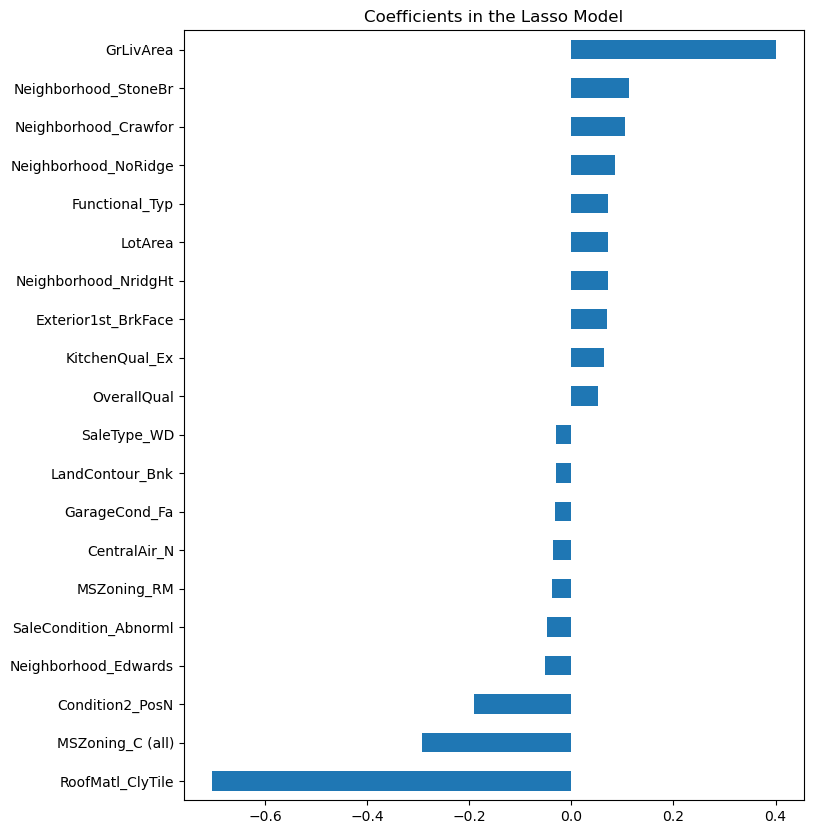

In [197]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_corf.plot(kind = 'barh')
plt.title('Coefficients in the Lasso Model')

從上面的圖表來看， GrLivArea(地上區域面積)對價格最具正向影響，而這也是很合理的事情，而部分負向影響的特徵可以深入研究。

#### 來觀察殘差分布
* 殘差意思 : 是指 "實際觀察值" 與 "模型觀察值" 之間的 "差異" 或 "誤差"。如何解讀殘差呢
    * 1.如果殘差接近零，表示模型的預測非常準確，每個觀測值的實際值都與預測值非常接近。
    * 2.如果殘差為正，表示模型低估了實際值，即預測值比實際值小。
    * 3.如果殘差為負，表示模型高估了實際值，即預測值比實際值大。
* 如果殘差呈現規則分布則表示模型對於某些特徵存在偏差
* 如果殘差呈現隨機分布，說明模型預測還算合理

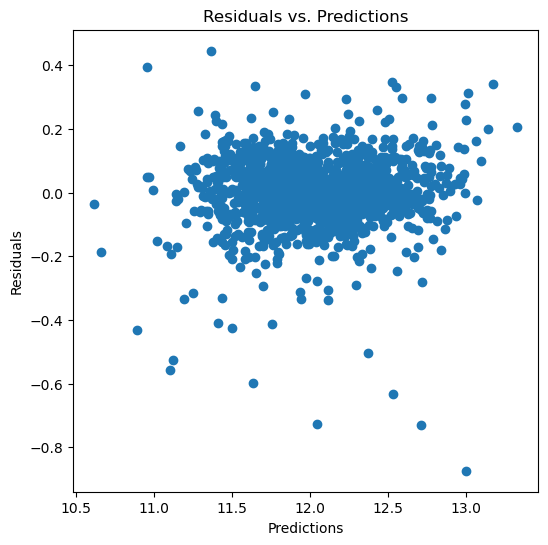

In [198]:
plt.figure(figsize=(6.0, 6.0))  # 設定圖形大小
# preds 有 preds 預測值 與 true 實際數值
# 'preds': model_lasso.predict(X_train) => 使用 lasso
# 'true' : 為實際值
preds = pd.DataFrame({'preds': model_lasso.predict(X_train), 'true': y})
# 計算殘差(預測的數值與實際值差異)
preds['residuals'] = preds['true'] - preds['preds']
# 繪製殘差散點圖
plt.scatter(preds['preds'], preds['residuals'])  
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')
plt.show()

從上面殘差分布度來看，呈現隨機分布

### 添加 XGBoost 到現有的模型
##### XGBoost（eXtreme Gradient Boosting） 介紹
* 是一種強大的機器學習算法，特別適用於解決各種監督學習問題，如分類和回歸
    * **1.Gradient Boosting：XGBoost**屬於梯度提升樹算法的一種，以決策樹為基礎模型，但透過堆疊多個決策樹來提升模型性能。
    * **2.Gradient(梯度) :** 模型預測的結果與實際結果的誤差，提升梯度可以減少誤差，可以透過XGBoost 建構下一顆心的決策樹來糾正殘差
    * **3.Boosting：**Boosting是一個迭代的過程，它通過反覆訓練一系列弱模型
    * **4.Xtreme :** XGBoost在優化和訓練過程中引入了一些創新的技術和優化，以提高性能和效率。這些包括並行處理、樹的剪枝、正規化(L1 Lasso 和 L2 Ridge)等技術，使XGBoost成為一個極端的、高性能的梯度提升樹算法，並防止過度擬和。
    * **5.自訂義損失函數:** 可以自訂損失函數，使模型可以適應不同類型問題，例如分類、回歸或排序
    * **6.稀疏感知:** 可以處裡含有大量遺漏值的資料集
    * **7.自動停止訓練機制:** 當模型性能訓練到一定程度不在提升時，可以執行停止訓練機制，防止模型最後過度擬和

In [199]:
import xgboost as xgb

In [200]:
# 使用 xgb.DMatrix 將 X_train轉為 XGBoost 特有的數據結構
# label=y 指定目標變數，就是要預測的值
dtrain = xgb.DMatrix(X_train, label = y)
# 將 X_test 轉為 DMatrix 格式，方便之後使用 XGBoost預測
dtest = xgb.DMatrix(X_test)
# max_depth 決定決策樹深度。 eta 學習速率，它控制每次迭代中模型權重的更新幅度
params = {"max_depth":2, "eta":0.1}
# 開始訓練 XGBoost 模型
# xgb.cv(模型配置參數, 要訓練的數據集, 訓練次數, 停止訓練機制(就是如果沒有顯著改進就停止訓練))
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

以上使用 XGBoost 框架訓練一個梯度提升樹模型，使用交叉驗證評估模型性能，並記錄損失函數

<Axes: >

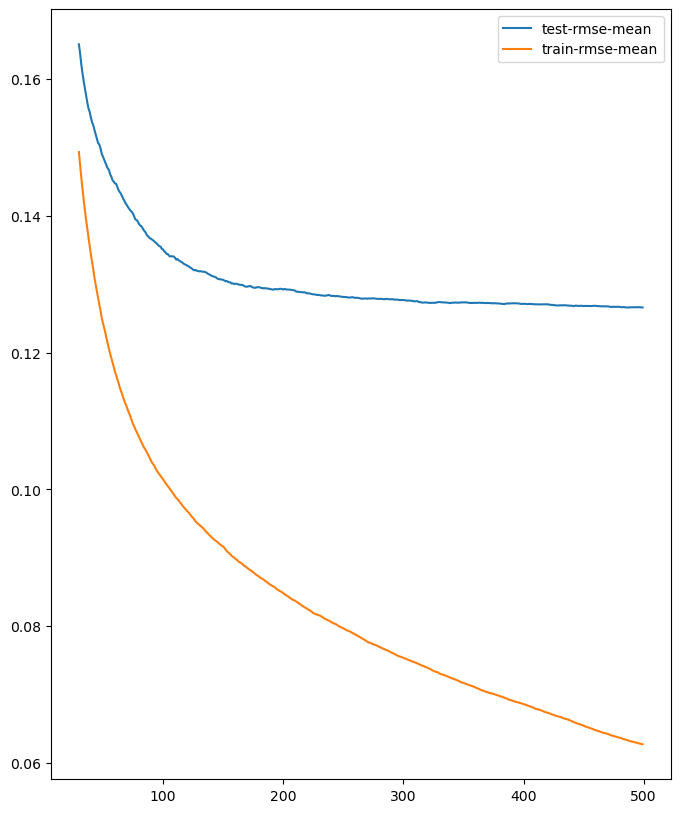

In [201]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

從上圖可得知，取第 30 筆到最後一筆資料開始迭代到最後一筆資料，測試集的RMSE 與 訓練集的 RMSE 都一起下降

#### 使用 XGBoost 建構回歸模型並進行訓練
* **XGBRegressor:** 為 XGBoost 裡的回歸，可以用於預測連續樹執行目標變數。重要參數包括以下
    * **1.n_estimators :** 決策樹數量，也稱迭代次數，每次迭代都會建立新的決策樹
    * **2.max_depth:** 控制每顆決策樹的最大深度，深度越深模型可能越複雜，也容易出現過度擬和
    * **3.learning_rate:** 學習速度，控制每一次迭代參數更新的幅度，較小的學習速率可以使模型收斂較穩定，但可能需要更多的迭代次數

In [202]:
# 建立 XGB 回歸模型，指定參數
model_xgb = xgb.XGBRegressor(n_estimators=400, max_depth=3, learning_rate=0.1)
# 指定訓練數據 X_train 與 目標變數 Y 來訓練模型
model_xgb.fit(X_train, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [203]:
# 分別使用 model_xgb 與 L1 Lasso 模型來預測數據
# np.expm1 就是將原本 使用 log1p取對數後的 X_test 還原成原始的數據
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

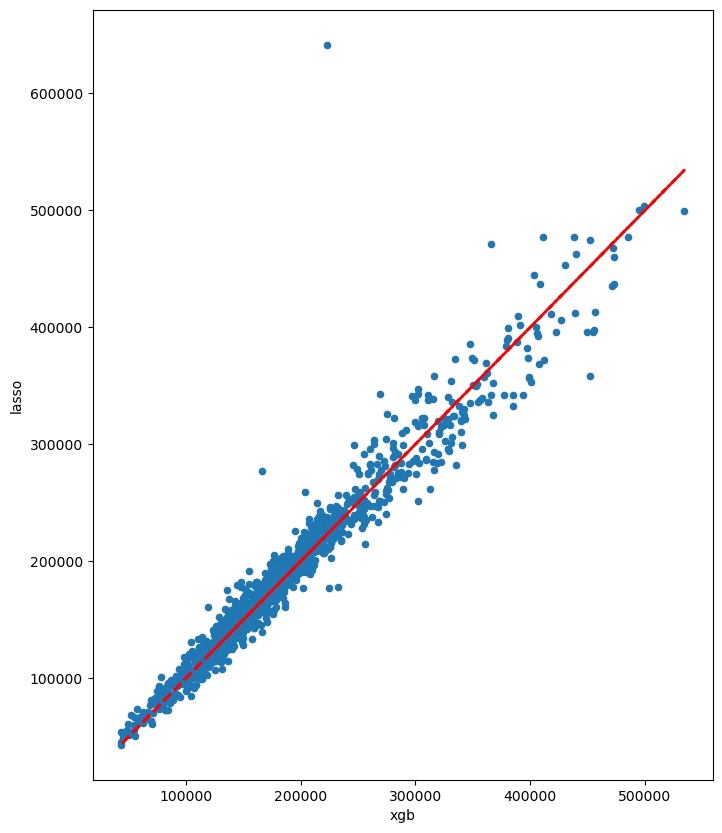

In [204]:
# 創建一個 df。裡頭有 xgb 預測結果 與 lasso 預測結果
predictions = pd.DataFrame({'xgb':xgb_preds, 'lasso':lasso_preds})
# 繪製點散圖
predictions.plot(x='xgb', y='lasso', kind='scatter')
#以 XGBoost回歸模型預測的結果 繪製一條斜線
plt.plot(predictions['xgb'], predictions['xgb'], color='red', linestyle='--', linewidth=2)

從上圖可以得知，兩種模型都聚集在斜線附近
* 而機器學習有時候將不相關的模型所預測的結果進行加權平均可以提高模型性能

In [205]:
preds = (0.3*lasso_preds + 0.7*xgb_preds).round().astype(int)
preds

array([119740, 156686, 185621, ..., 155479, 116997, 226437])

In [206]:
final_predict_data = pd.DataFrame({'id:':test.Id, 'SalePrice':preds})
final_predict_data

,id:,SalePrice
0,1461,119740
1,1462,156686
2,1463,185621
3,1464,192114
4,1465,186591
...,...,...
1454,2915,82383
1455,2916,78852
1456,2917,155479
1457,2918,116997


### 來看預測數值與答案的差異

In [207]:
ans_data = pd.read_csv(r'E:\DataLearn\1.House\4-Linear Models\data\sample_submission.csv')
ans_data = ans_data.round().astype(int)
ans_data

,Id,SalePrice
0,1461,169277
1,1462,187758
2,1463,183584
3,1464,179317
4,1465,150730
...,...,...
1454,2915,167081
1455,2916,164789
1456,2917,219222
1457,2918,184924


In [208]:
from sklearn.metrics import mean_squared_error
ans_values = ans_data['SalePrice']

# 計算 mse
mse = mean_squared_error(ans_values, preds)
print('MSE : ', mse)

MSE :  142942916.88485265


#### 繪製點散圖來觀查預測出來的資料與實際值資料

In [209]:
Compare_data = pd.DataFrame({'AnsSalePrice':ans_values, 'PredSalePrice':preds})
Compare_data

,AnsSalePrice,PredSalePrice
0,169277,119740
1,187758,156686
2,183584,185621
3,179317,192114
4,150730,186591
...,...,...
1454,167081,82383
1455,164789,78852
1456,219222,155479
1457,184924,116997
